<a href="https://colab.research.google.com/github/dchappell2/Computational-Physics/blob/main/Python_Tutorials/Chapter_11_OOP_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--

author:  David Chappell (Modified from Michelle P. Kuchera)
created: June 16, 2022
license: This code is released under the GNU GPL. Please feel free to use, modify, re-release at your will. You can not construct closed-source or proprietary software with this code. Please contact me (and Michelle) if this is your desire.

-->

#Chapter 11 - Object-Oriented Plotting

Goals:
* Create plots using the Matplotlib library's object-oriented interface
* Explore 2D and 3D plots




## 11.0 Overview

The Python library Matplotlib offers two different approaches to plotting:
* The "state machine" approach: which uses pyplot to mimick Matlab commands (best for simple plots, especially for programmers already familiar with Matlab)
* The object-oriented approach (preferred by "pythonic" object-oriented programmers) that offers more control

In the last tutorial we saw how the `plt` module was used in the state machine approach to quickly and simply create plots.

In this tutorial we will see how to create plots by directly working with the Axes `ax` and figure `fig` objects. This approach, while slighly more "fiddly" offers more control over plotting and is required for most 3D plots, axis customization, and more.  

An excellent overview of these approaches can be found at the following link and should be required reading for anyone plotting in Python: https://matplotlib.org/2.0.2/faq/usage_faq.html

The matplotlib site has hundreds of plotting examples:  https://matplotlib.org/stable/gallery/index.html


## 11.1 2D Plots

We will use plotting commands in pyplot, a module within the Matplotlib library. To use this approach one typically imports matplotlib.pyplot as plt. This renames matplotlib.pyplot as simply `plt`, making it easier to work with. We'll start by going over plots similar to those made using the state machine approach in the previous tutorial.


### 🔆 Example:  Line Plot

In the object-oriented approach, we use the `subplots()`  command that returns a figure object `fig` and an axis object `ax`.
* Note: the `subplots()` command is **not** the same as the `subplot()` command used in the state machine approach.
* When `subplots()` has no arguments, it creates a single plot with the default size. We'll explore more ways of using `subplots()` below.
* The object-oriented approach uses the axis object `ax` to handle most of the commands we previously used `plt` forWe then use methods of those objects to plot the curves, label the axes, create the legend, etc. Notice that we use the `subplots()` command even though we only want to create a single plot. This command will create a single plot by default when no parameters are passed to it. To see how to use it to make multiple plots see below.

This method allows for more control over the appearance of plot than the state machine approach.


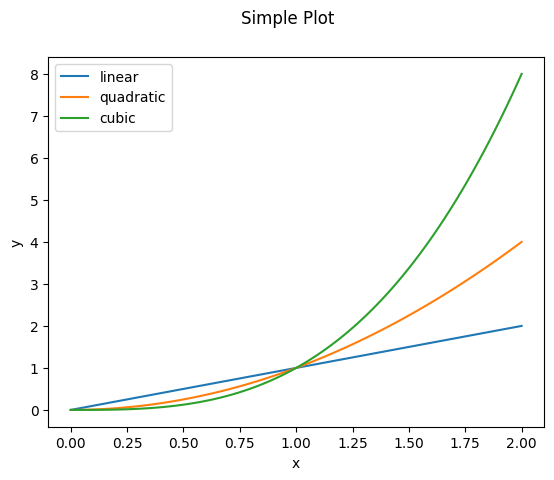

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# define a numpy array of 100 x values from 0 to 2
x = np.linspace(0, 2, 100)

# create a figure object and an axis object
fig, ax = plt.subplots()

# plot three functions of x, and define labels for each in the legend
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')

ax.set_xlabel("x")             # label axes
ax.set_ylabel("y")
fig.suptitle("Simple Plot")    # give plot a title
ax.legend()                    # create a legend
plt.show()

### 🔆 Example:  multiple subplots

In this example we use the `subplots()` command to create a grid of subplots on one page.
* We pass the number of rows in columns in the grid of plots using `nrows=` and `ncols=`.
* We also specify the figure dimensions in inches
* The returned Axes object `ax` is a list, with the left-most plot being `ax[0]`, the middle plot being `ax[1]` and the right plot being `ax[2]`.
* Notice that the commands to labels the axes and give the plot a title are also different using the Axes object compared with the `plt` module.
* The `suptitle()` command is method of the `fig` object. It creates a title for the entire figure.



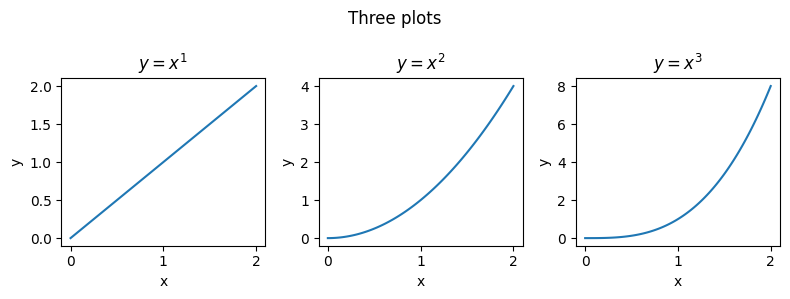

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# define a numpy array of 100 x values from 0 to 2
x = np.linspace(0, 2, 100)

# create 3 plots
nPlots = 3

# create a matrix of plots with nPlots rows and 1 column
fig, ax = plt.subplots(nrows=1,ncols=nPlots,figsize=(8,3))

# loop to create the three plots
for k in range(0,nPlots):
    ax[k].plot(x, x**(k+1))
    ax[k].set_xlabel("x")
    ax[k].set_ylabel("y")
    ax[k].set_title(f'$y = x^{k+1}$')

fig.suptitle("Three plots")    # give plot a title
fig.tight_layout()             # reduce whitespace around the plots

### 🔆 Example:  Axis Limits and Custom Tick Marks

This example sets the limits on the x axis and uses custom tick marks.

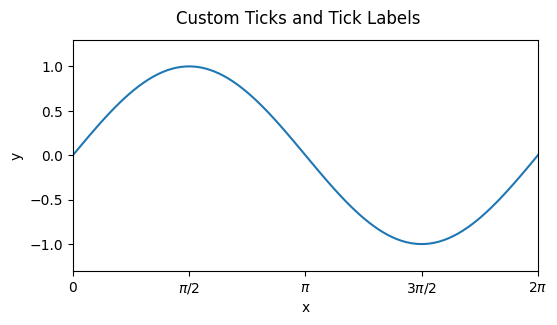

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# define a numpy array of 100 x values from 0 to 2
x = np.linspace(0,2*np.pi,100)
y = np.sin(x)

# create a figure object and an axis object
fig, ax = plt.subplots(figsize=(6,3))

# plot three functions of x, and define labels for each in the legend
ax.plot(x, y, label='linear')

ax.set_xlabel("x")             # label axes
ax.set_ylabel("y")
ax.set_xlim(x[0],x[-1])        # set x-axis limits
ax.set_ylim(-1.3, 1.3)         # set y-axis limits

# create custom tick marks
ax.set_xticks([0, np.pi/2, np.pi, (3*np.pi)/2, 2*np.pi])
ax.set_xticklabels(['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

fig.suptitle("Custom Ticks and Tick Labels")    # give plot a title
plt.show()

## 11.2 Parametric Plots in 3D


### 🔆 Example:  3D Spriral

This example creates a 3D spiral and plots it in a 3D coordinate grid.
* We create a function called `spiral()` that returns the $x, \, y, \, z$ coordinates of the points along the curve.
* The 3D axes are created by specifying a 3D projection in the `plt.figure()` function.

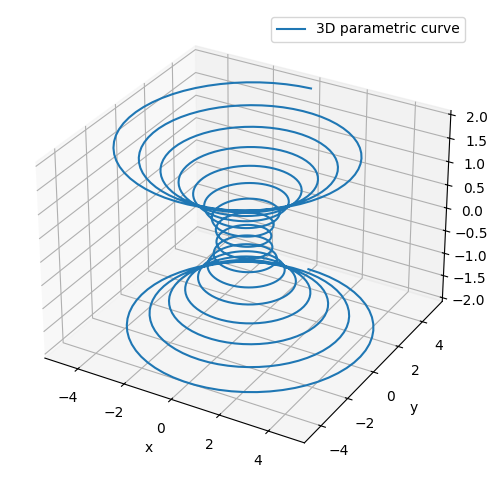

In [7]:
import matplotlib.pyplot as plt
import numpy as np

##########  Create and return points along 3D spiral
def spiral(theta0=16*np.pi, N=1000):
    theta = np.linspace(-theta0, theta0, N)
    z = np.linspace(-2, 2, N)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return theta, x, y, z

theta, x, y, z = spiral()    # call spiral function

# plot curve in 3D space
ax = plt.figure(figsize=(6,6)).add_subplot(projection='3d')
ax.plot(x, y, z, label='3D parametric curve')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

## 11.3 Image Plots


### 🔆 Example:  Airy Function

The Airy function describes the intensity of light after passing through a small, circular aperture. It may be written in terms of the Bessel function of the first kind $J_1(\alpha)$, where $\alpha$ depends on the angular distance from the center of the pattern, the wavelength of the light, diameter of the aperture, etc.$$I(\alpha) =\left( \frac{J_1(\alpha)}{\alpha}\right)^2$$.

In this example, we plot the intensity using the `imshow()` command. It uses the state machine approach rather than an OOP approach.



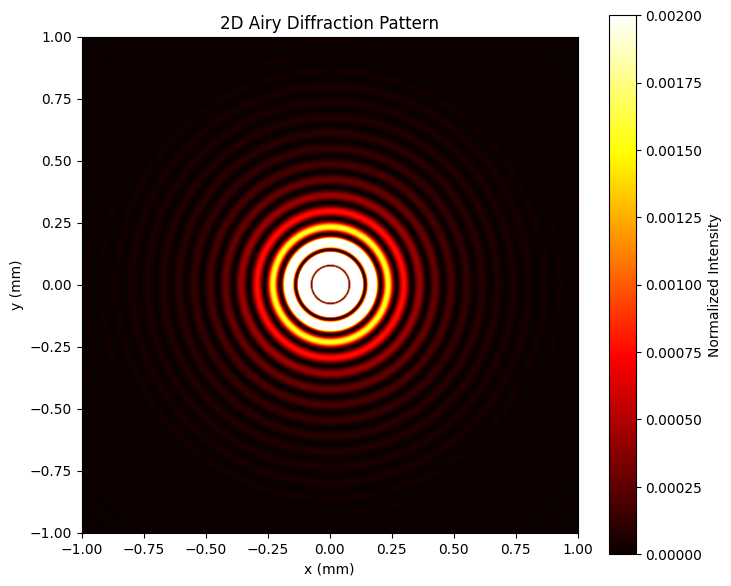

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1

# Calculates and returns the Airy function that results when light diffracts
# through a circular aperture
def airy(L=1, num_points=500):

    # Create grid
    x = np.linspace(-L, L, num_points)
    y = np.linspace(-L, L, num_points)
    X, Y = np.meshgrid(x, y)

    # Calculate the radial distance from the center
    R = np.sqrt(X**2 + Y**2)
    airy_arg = R*50           # this is alpha in the equation above

    # Calculate Airy function
    intensity = (2 * j1(airy_arg) / airy_arg)**2

    return X, Y, intensity

#########  parameters

L = 1
X, Y, intensity = airy(L)

# Plot the 2D Airy pattern
plt.figure(figsize=(8, 7))
plt.imshow(intensity, extent=[-L, L, -L, L],
           cmap='hot', origin='lower', vmin=0, vmax=.002)
plt.colorbar(label='Normalized Intensity')
plt.title('2D Airy Diffraction Pattern')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.show()


### 🔆 Example: 3D Shading

In this example, we visualize the Airy pattern using 3D shading effects.
* Before displaying the image with `imshow()`, we first use the LightSource module in MatPlotLib to create shading


Text(0.5, 1.0, 'Shading Created with LighSource()')

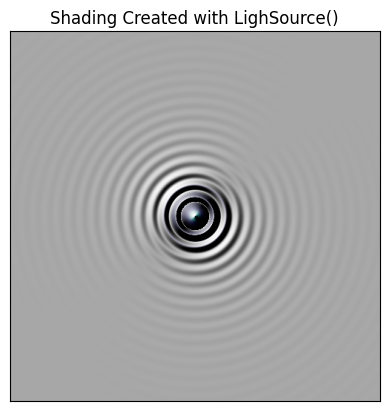

In [43]:
from matplotlib.colors import LightSource

L = 1
X, Y, intensity = airy(L)

fig, ax = plt.subplots()
ax.set(xticks=[], yticks=[])

# Illuminate the scene from the northwest
ls = LightSource(azdeg=315, altdeg=45)
#ls = LightSource(azdeg=315, altdeg=45,hsv_min_val=0.8, hsv_max_val=0.9)

cmap = plt.cm.bone
rgb = ls.shade(intensity, cmap=cmap, vert_exag=2000, blend_mode='hsv')
ax.imshow(rgb)
plt.title('Shading Created with LighSource()')


### 🔆 Example:  Contour Map

Contour maps segment an image into iso-value or iso-height contours. We use the following function to demonstrate it: $$ I(x,y) = \sin(x) + \sin(y)$$
* We use a color map that uses two hues:  green and purple. The negative values are purple (and dashed lines) and the positive values are green (with solid lines).

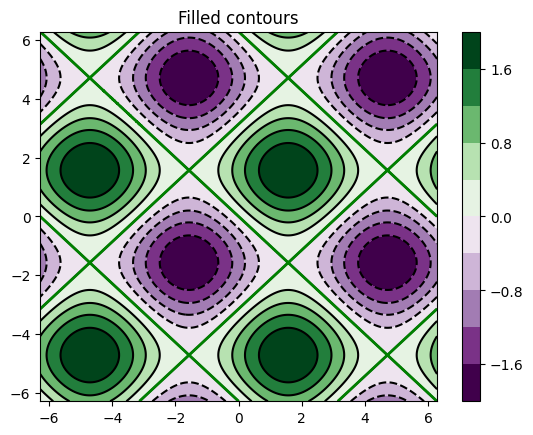

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm

# Calculates and returns p
def my_fun(L=1, num_points=500):

    # Create grid
    x = np.linspace(-L, L, num_points)
    y = np.linspace(-L, L, num_points)
    X, Y = np.meshgrid(x, y)

    # Calculate Airy function
    intensity = np.sin(X)+np.sin(Y)

    return X, Y, intensity

# evaluate function
X, Y, Z = my_fun(2*np.pi)

# Boost the upper limit to avoid truncation errors.
levels = np.arange(-2, 2.2, 0.4)

norm = cm.colors.Normalize(vmax=2, vmin=-2)
cmap = cm.PRGn

fig, ax = plt.subplots()
cset1 = ax.contourf(X, Y, Z, levels, norm=norm,
                        cmap=cmap.resampled(len(levels) - 1))
cset2 = ax.contour(X, Y, Z, cset1.levels, colors='k')

cset3 = ax.contour(X, Y, Z, (0,), colors='g', linewidths=2)
ax.set_title('Filled contours')
ax.set_xlim(np.min(X),np.max(X))
fig.colorbar(cset1, ax=ax)

## 11.3 Surface Plots in 3D

Surface plots can be used in a few ways:
* to display the 2D surface of an object in 3D space
* to display a surface contour of iso-values of a 3D function in 3D space
* to plot values of a function as an elevation over a 2D space.

### 🔆 Example: Surface plot

In this example, we plot the function that was shown in the previous example as a surface plot.

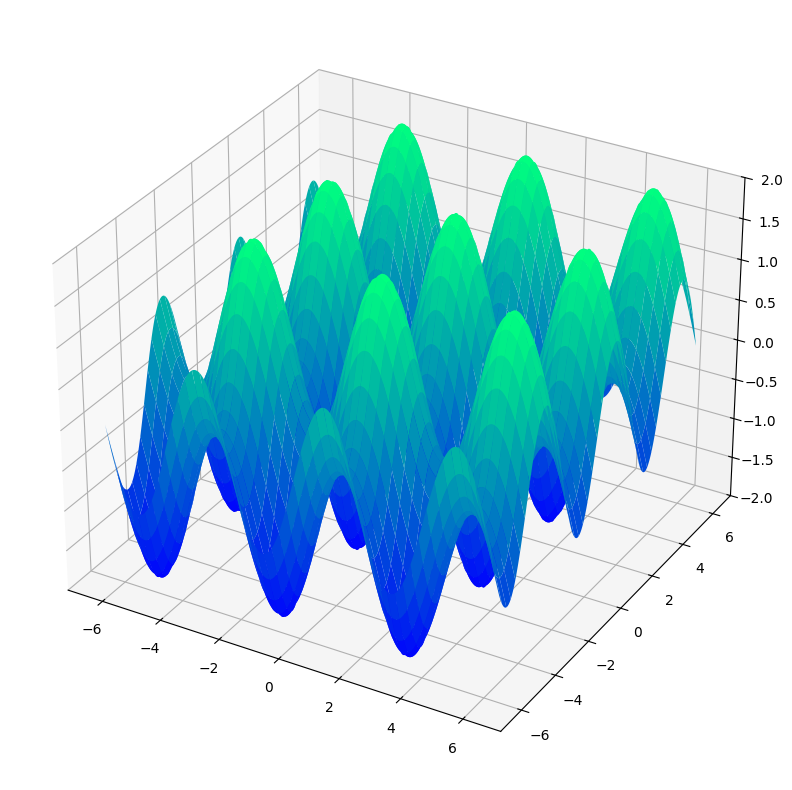

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import j1

#########  parameters

X, Y, Z = my_fun(2*np.pi)

# plot sphere
fig = plt.figure(figsize=(10, 10))
#if ax is None:
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, intensity, cmap='winter', alpha=1)
ax.set_zlim(-2,2)
plt.show()

### 🔆 Example:  Plotting a Sphere

This example plots the surface of a sphere in 3D space.

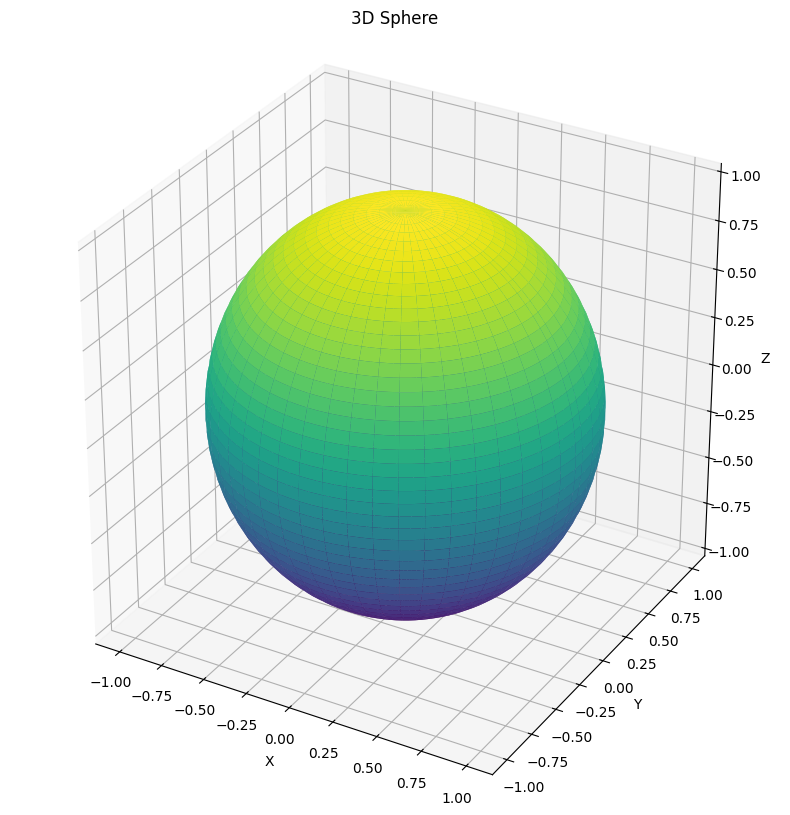

In [29]:
import numpy as np
import matplotlib.pyplot as plt

def plot_sphere(r0=(0,0,0), R=1, N=100, ax=None):
    # define grid point on surface of sphere
    theta = np.linspace(0, 2 * np.pi, N)
    phi = np.linspace(0, np.pi, int(N/2))
    theta, phi = np.meshgrid(theta, phi)

    # Convert to Cartesian coordinates
    x = R * np.sin(phi) * np.cos(theta)
    y = R * np.sin(phi) * np.sin(theta)
    z = R * np.cos(phi)

    # plot sphere
    fig = plt.figure(figsize=(10, 10))
    if ax is None:
        ax = fig.add_subplot(111, projection='3d')


    ax.plot_surface(x, y, z, cmap='viridis', alpha=1)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D Sphere')
    ax.set_box_aspect((1, 1, 1))
    #if ax is None:
    plt.show()

#ax = fig.add_subplot(111, projection='3d')
plot_sphere()
#plt.show()



## 11.4 Vector Fields

This example plots the following vector field:
$$ \vec{v} = \cos x \hat{x} + \sin y \hat{y} $$

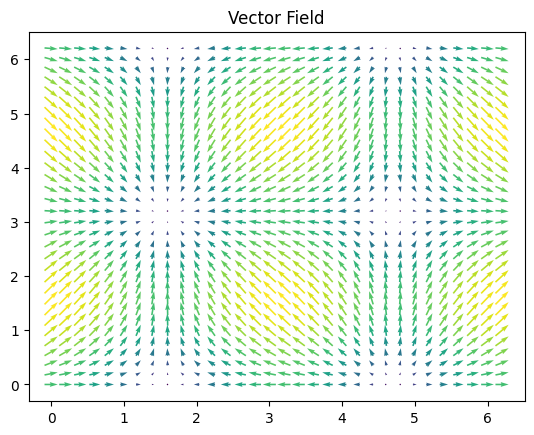

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# create a vector field
X, Y = np.meshgrid(np.arange(0, 2 * np.pi, .2), np.arange(0, 2 * np.pi, .2))
U = np.cos(X)
V = np.sin(Y)

#plot the vectorfield
fig, ax = plt.subplots()
M = np.hypot(U, V)   # find magnitude, "hypotenuse", to color-code each arrow
Q = ax.quiver(X, Y, U, V, M, units='x', pivot='mid', width=0.022,
               scale= 5.5)
ax.set_title("Vector Field")

plt.show()


## 11.5 Resources
Now you know the basics of plotting with Matplotlib. Here are a few resources to learn more:
* Matplotlib overview of plot types:  https://matplotlib.org/stable/plot_types/index.html
* Matplotlib tutorial on state machine vs object oriented programming:  https://matplotlib.org/2.0.2/faq/usage_faq.html
* Tutorial on object-oriented programming for chemists:  https://pythoninchemistry.org/intro_python_chemists/basics/oop_intro.html
* The matplotlib site has hundreds of plotting examples: https://matplotlib.org/stable/gallery/index.html


